# Quantitative approach to topology generators

Tanya Strydom [](https://orcid.org/0000-0001-6067-1349)  
March 26, 2024

I think in the long run I will probably turn the other repo ([BecksLab/topology_generators](https://github.com/BecksLab/topology_generators)) into a project that we can then access and I will port all of the working code here… I think it will just come down to what the ‘cost’ is of the computational side of things and how convoluted it might end up looking.

Anyway so for now I am just pulling in the INTERIM data from some of the models. This uses (for now) 20 mangal \[@poisotMangalMakingEcological2016\] datasets and just generates some networks for using the niche and cascade models. The ‘results’ for now is just counting the number of links each model generates for each network because that’s what my brain decided on doing…

In [ ]:
#| include: false
#| warning: false
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Lets just do a simple little plot where we plot real vs model observed

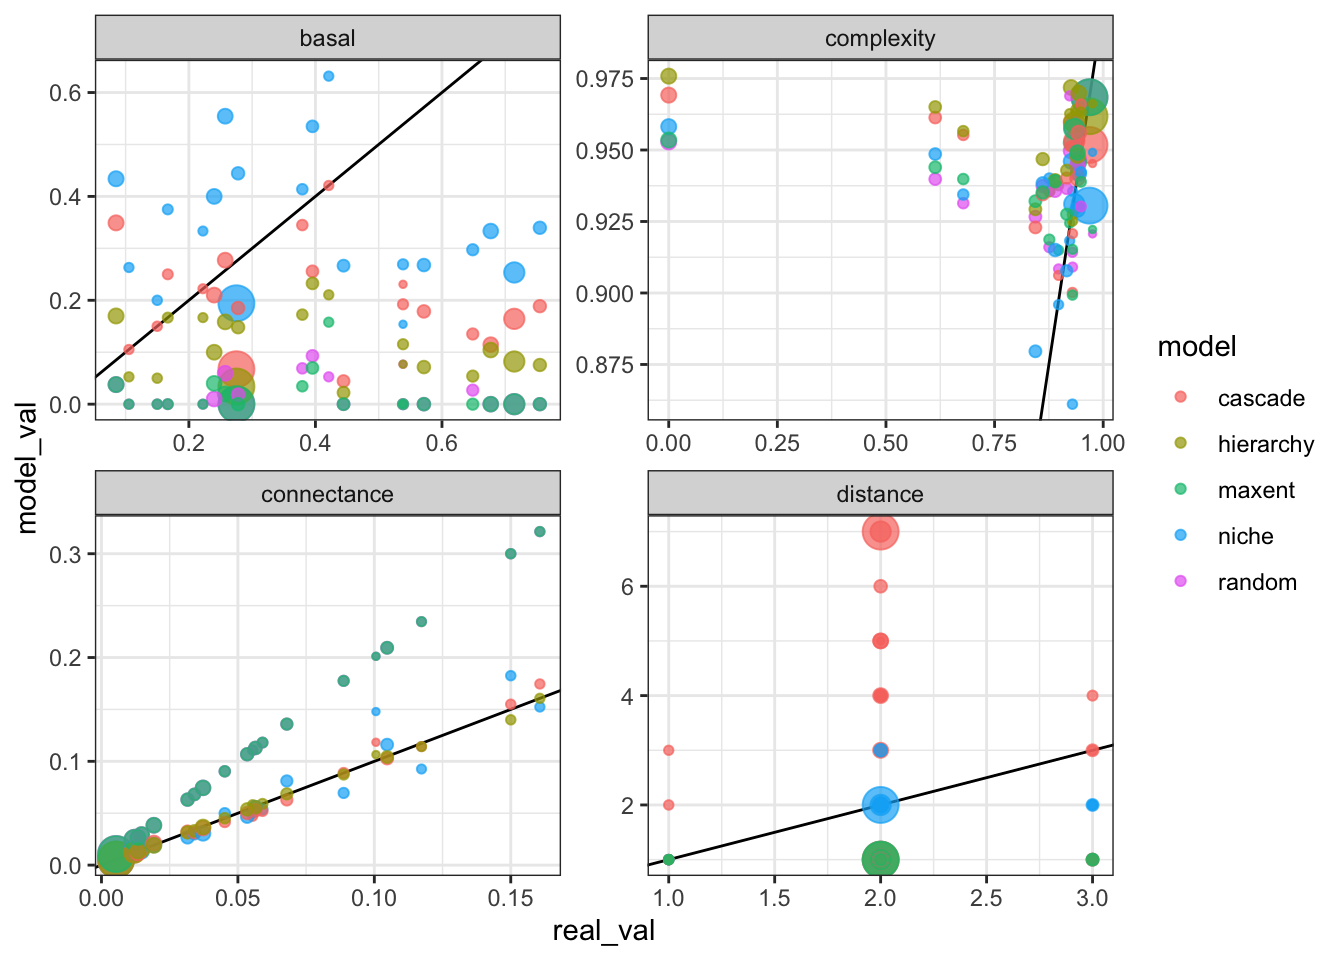

In [ ]:
#| warning: false
#| echo: false
#| label: fig-topology
#| fig-cap: "Real vs observed values for network summary statistics. Note here that 'basal' is calculated as the proportion of species that have a generality value of zero *i.e.,* are basal AFAIK"

ggplot() +
    geom_abline(slope = 1,
                intercept = 0) +
    geom_point(data = df,
                aes(x = real_val,
                    y = model_val,
                    size = richness,
                    colour = model,
                    fill = model),
                alpha = 0.7,
                shape = 21) +
    facet_wrap(vars(test),
                scales = "free") +
    scale_size(guide = 'none') +
    theme_bw()

## References